## 피마 인디언의 당뇨병 예측하기

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline


* 데이터 불러오기

In [29]:
df = pd.read_csv("./dataset/pima-indians-diabetes.csv",
                names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

* 데이터 확인하기

In [30]:
print(df.head(5))
print(df.info())
print(df.describe())

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null

* 임신횟수(pregnant)와 당뇨병 발병여부(class)만 확인

In [31]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


* 임신 횟수당 당뇨병 발병 확률

In [32]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


* matplotlib를 이용해 그래프로 표현하기

In [33]:
import seaborn as sns  # 좀 더 정교한 그래프를 그리게끔 도와주는 라이브러리

In [34]:
plt.figure(figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

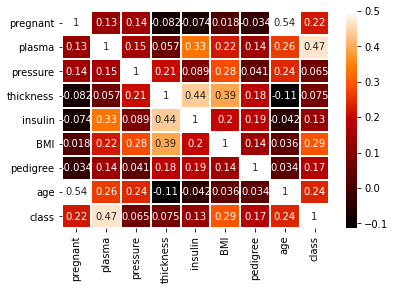

In [35]:
# heatmap() 함수는 각 항목간의 상관관계를 나태내줌
# 두 항목이 전혀 다른 패턴이면 0, 서로 비슷한 패턴으로 변할수록 1에 가까운 값 출력
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

* class 항목과 가장 상관관계가 높은 plasma항목과의 관계를 그래프로 표현

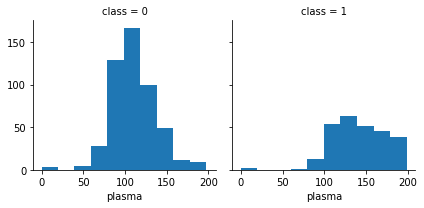

In [36]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

* 피마 인디언의 당뇨병 예측 실행

In [37]:
# seed값 생성
np.random.seed(3)
tf.random.set_seed(3)

In [41]:
# 데이터 로드
dataset = np.loadtxt("./dataset/pima-indians-diabetes.csv", delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [42]:
# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [44]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 0s 543us/step - loss: 8.9094 - accuracy: 0.6118
Epoch 2/200
77/77 [==============================] - 0s 543us/step - loss: 3.0714 - accuracy: 0.5777
Epoch 3/200
77/77 [==============================] - 0s 521us/step - loss: 1.4273 - accuracy: 0.4107
Epoch 4/200
77/77 [==============================] - 0s 521us/step - loss: 0.8676 - accuracy: 0.6224
Epoch 5/200
77/77 [==============================] - 0s 498us/step - loss: 0.7041 - accuracy: 0.6182
Epoch 6/200
77/77 [==============================] - 0s 511us/step - loss: 0.6998 - accuracy: 0.6398
Epoch 7/200
77/77 [==============================] - 0s 499us/step - loss: 0.6622 - accuracy: 0.6479
Epoch 8/200
77/77 [==============================] - 0s 499us/step - loss: 0.6459 - accuracy: 0.6801
Epoch 9/200
77/77 [==============================] - 0s 531us/step - loss: 0.6348 - accuracy: 0.6895
Epoch 10/200
77/77 [==============================] - 0s 527us/step - loss: 0.6447 - accura

Epoch 81/200
77/77 [==============================] - 0s 459us/step - loss: 0.5230 - accuracy: 0.7283
Epoch 82/200
77/77 [==============================] - 0s 472us/step - loss: 0.5309 - accuracy: 0.7443
Epoch 83/200
77/77 [==============================] - 0s 459us/step - loss: 0.5536 - accuracy: 0.7231
Epoch 84/200
77/77 [==============================] - 0s 446us/step - loss: 0.4993 - accuracy: 0.7658
Epoch 85/200
77/77 [==============================] - 0s 459us/step - loss: 0.5162 - accuracy: 0.7535
Epoch 86/200
77/77 [==============================] - 0s 446us/step - loss: 0.5163 - accuracy: 0.7609
Epoch 87/200
77/77 [==============================] - 0s 486us/step - loss: 0.5151 - accuracy: 0.7782
Epoch 88/200
77/77 [==============================] - 0s 481us/step - loss: 0.5109 - accuracy: 0.7564
Epoch 89/200
77/77 [==============================] - 0s 472us/step - loss: 0.4808 - accuracy: 0.7742
Epoch 90/200
77/77 [==============================] - 0s 484us/step - loss: 0.5262

77/77 [==============================] - 0s 486us/step - loss: 0.4345 - accuracy: 0.7960
Epoch 161/200
77/77 [==============================] - 0s 468us/step - loss: 0.4520 - accuracy: 0.7859
Epoch 162/200
77/77 [==============================] - 0s 472us/step - loss: 0.4520 - accuracy: 0.7849
Epoch 163/200
77/77 [==============================] - 0s 486us/step - loss: 0.4963 - accuracy: 0.7391
Epoch 164/200
77/77 [==============================] - 0s 446us/step - loss: 0.4957 - accuracy: 0.7552
Epoch 165/200
77/77 [==============================] - 0s 446us/step - loss: 0.4709 - accuracy: 0.7657
Epoch 166/200
77/77 [==============================] - 0s 446us/step - loss: 0.4748 - accuracy: 0.7492
Epoch 167/200
77/77 [==============================] - 0s 446us/step - loss: 0.4729 - accuracy: 0.7487
Epoch 168/200
77/77 [==============================] - 0s 459us/step - loss: 0.4707 - accuracy: 0.7624
Epoch 169/200
77/77 [==============================] - 0s 459us/step - loss: 0.4589 - a

In [45]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

24/24 [==============================] - 0s 519us/step - loss: 0.4751 - accuracy: 0.7630

 Accuracy: 0.7630
